In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# import sarimax
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv('electrecity.csv', index_col='Month', parse_dates=True)
# rename Month column to Date
df.index.names = ['Date']
df.dropna(inplace=True)
df = df.iloc[::-1]
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15996\4100388942.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('electrecity.csv', index_col='Month', parse_dates=True)


,Sales
Date,
2000-12-01,310816.06880
2001-01-01,272334.73804
2001-02-01,269298.40142
2001-03-01,254390.93545
2001-04-01,264490.49166


In [28]:
train_size = len(df) - 60

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


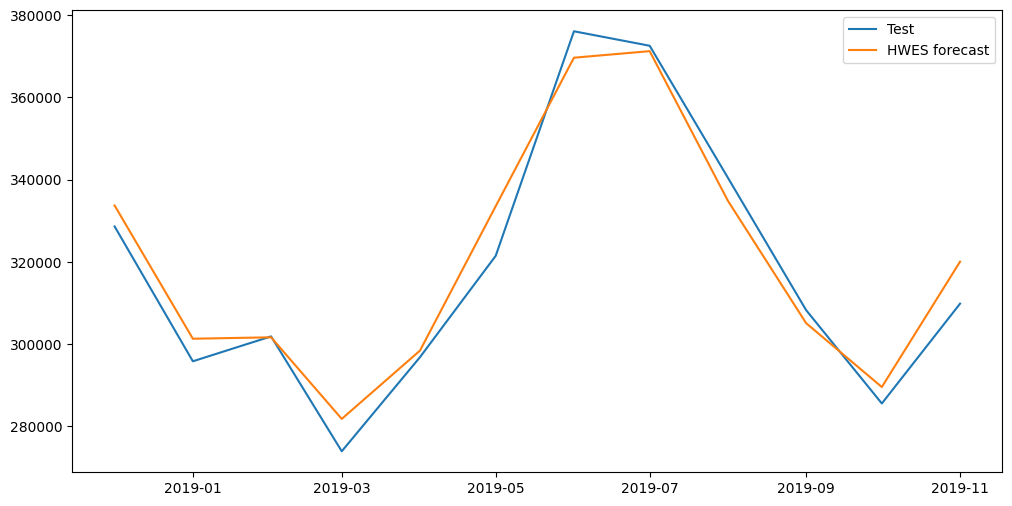

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


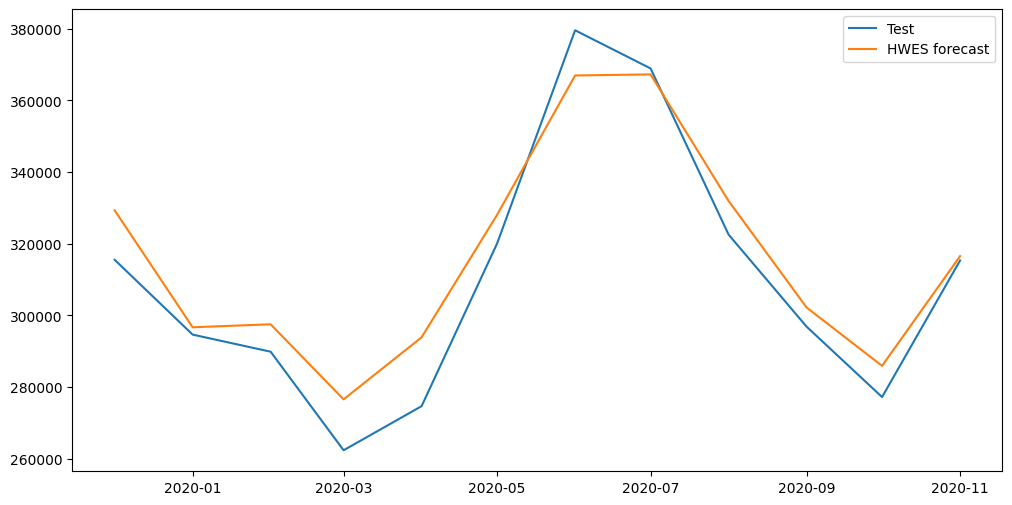

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


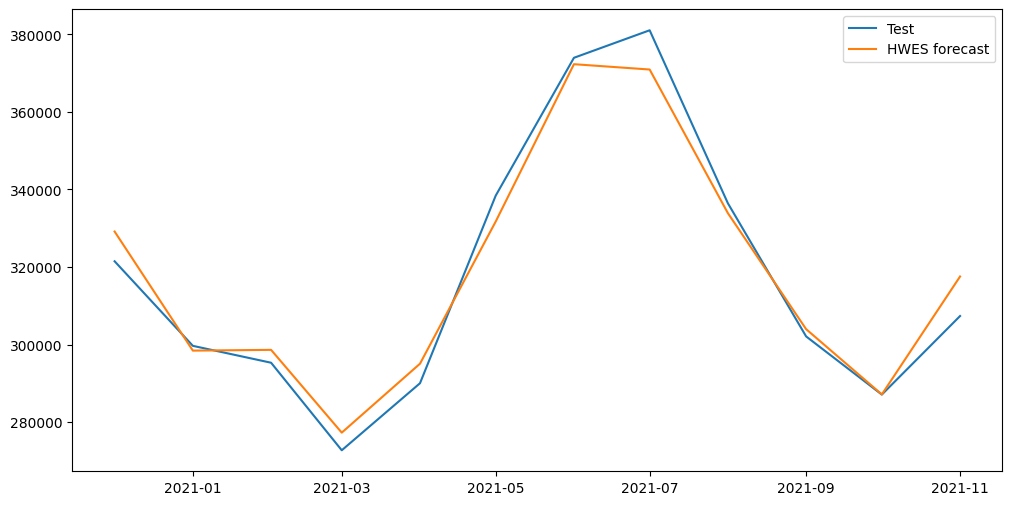

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


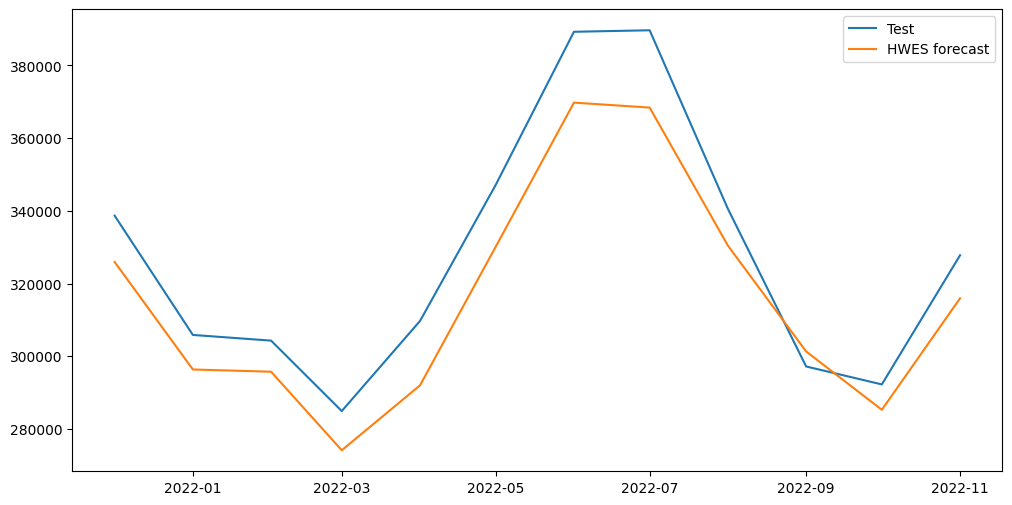

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


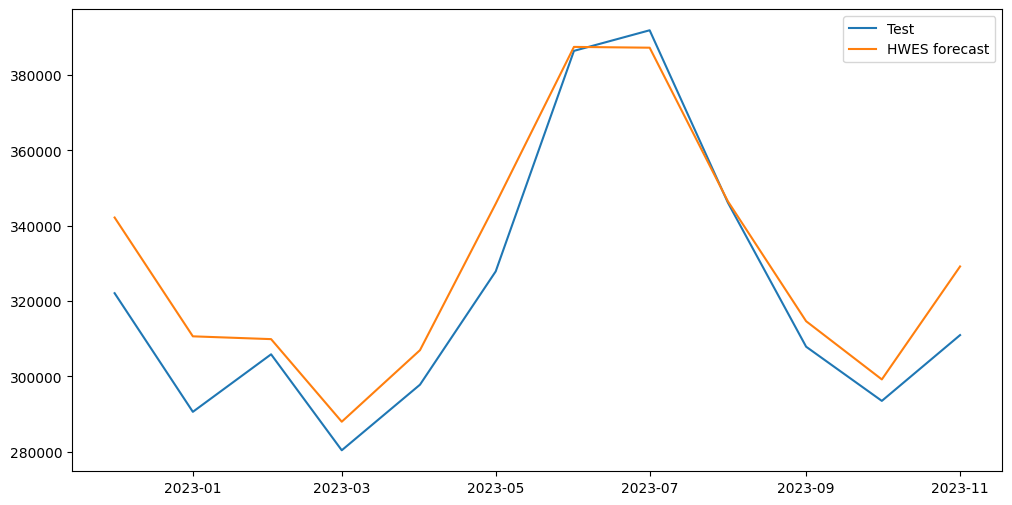

In [29]:
mse_hwes = []
for i in range (5):
    start_index = 12 * i
    end_index = start_index + train_size + 12
    train = df.iloc[start_index:train_size + start_index]
    test = df.iloc[train_size + start_index:end_index]

    hwes_model = HWES(
    train,
    trend='mul',
    damped_trend=True,
    seasonal='mul',
    seasonal_periods=12
    ).fit()

    # plot the forecast with test
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Test')
    plt.plot(hwes_model.forecast(12), label='HWES forecast')
    plt.legend()
    plt.show()

    # calculate mean squared error
    mse_hwes.append(mean_squared_error(test, hwes_model.forecast(12)))

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


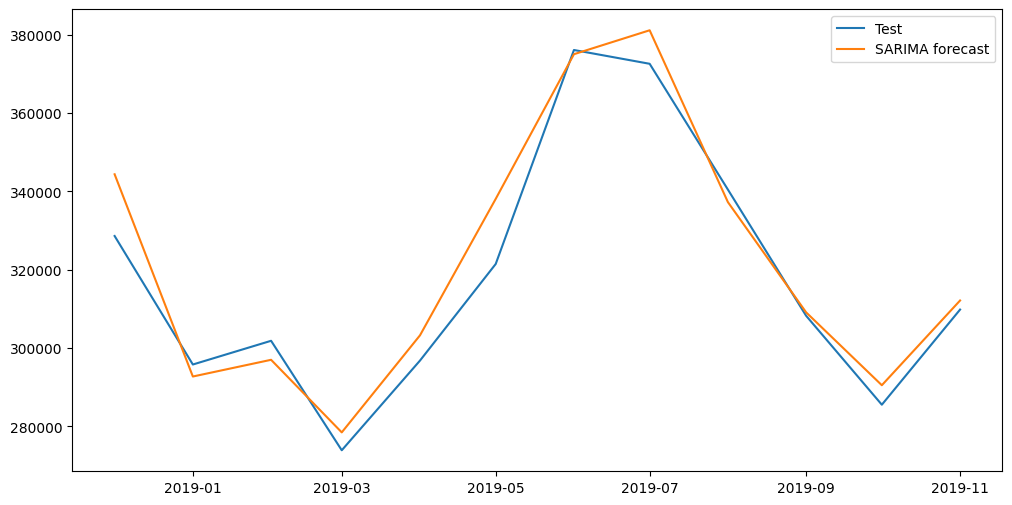

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


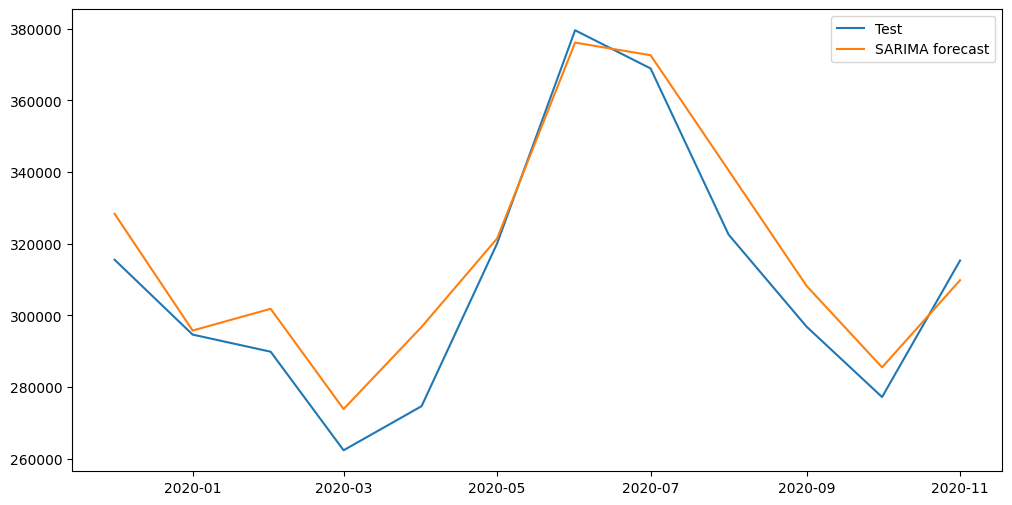

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


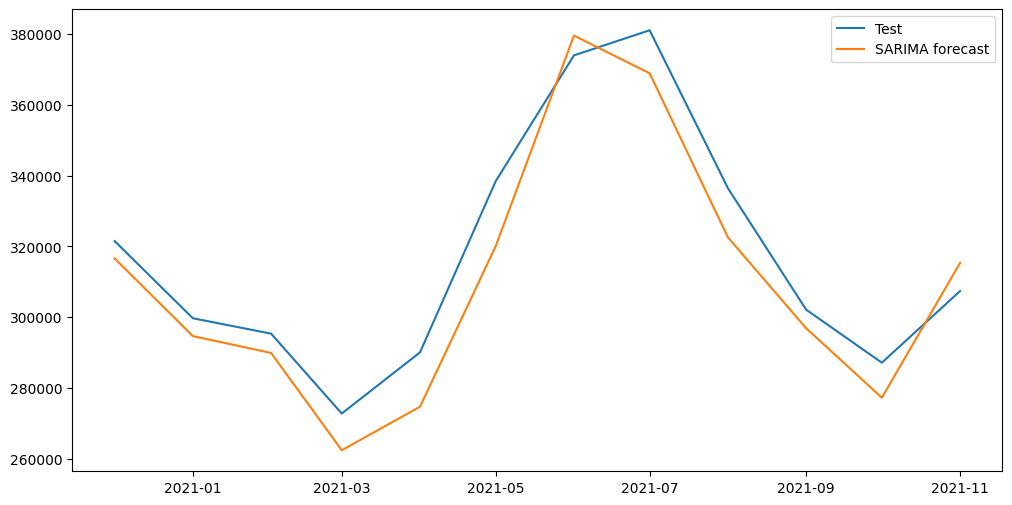

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


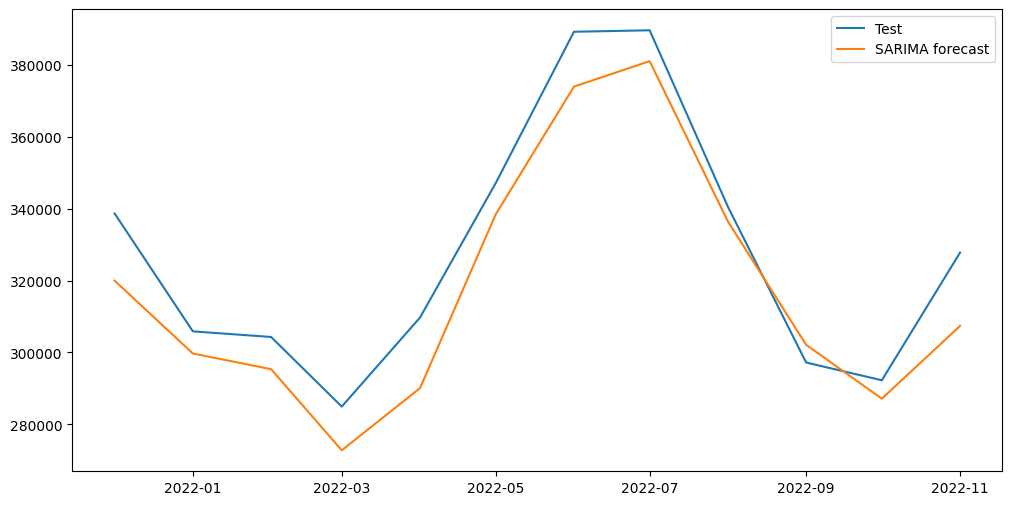

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


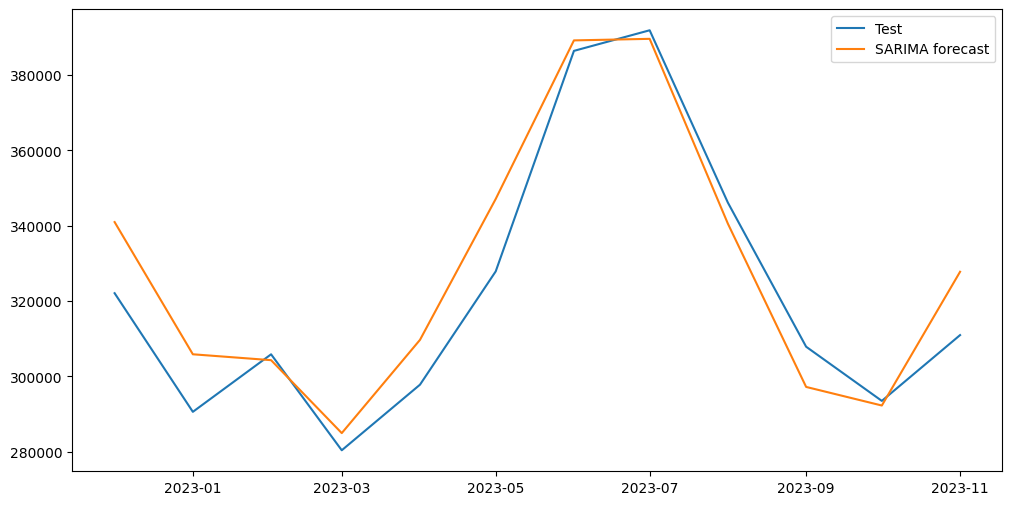

In [30]:
sarimax_mse = []
for i in range (5):
    start_index = 12 * i
    end_index = start_index + train_size + 12
    train = df.iloc[start_index:train_size + start_index]
    test = df.iloc[train_size + start_index:end_index]

    model_sarimax = SARIMAX(train, order=(0,0,1), seasonal_order=(0,1,0,12))
    fit_SARIMAX = model_sarimax.fit()
    start = len(train)
    end = len(train) + len(test) -1
    prediction_SARIMA = fit_SARIMAX.predict(start, end).rename('SARIMA')

    # plot the forecast with test
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Test')
    plt.plot(prediction_SARIMA, label='SARIMA forecast')
    plt.legend()
    plt.show()

    sarimax_mse.append(mean_squared_error(test, prediction_SARIMA))

In [31]:
# make table for mse results for each window and model
results = pd.DataFrame({'HWES': mse_hwes, 'SARIMAX': sarimax_mse})

In [32]:
results

,HWES,SARIMAX
0,3.928425e+07,6.127913e+07
1,1.035164e+08,1.254119e+08
2,3.172660e+07,1.099840e+08
3,1.819193e+08,1.555297e+08
4,1.432856e+08,1.306296e+08
